# Análisis estadístico de Data Products

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/DP6_covid19-peru_info-fallecidos.csv')

In [3]:
# Convertir a formato fecha
df['fecha_fallecimiento'] = pd.to_datetime(df['fecha_fallecimiento'], format = '%Y-%m-%d')

lst_dates = ['fecha_vacuna_1', 'fecha_vacuna_2', 'fecha_vacuna_3']
for date in lst_dates:
    df.loc[:,date] = pd.to_datetime(df[date], format = '%Y%m%d')
del lst_dates, date

In [4]:
df

,id_persona,fecha_fallecimiento,year,epi_week,time_days,sexo,edad,edad_cat,departamento,vacunado,dosis_1,fecha_vacuna_1,id_vacuna_1,dosis_2,fecha_vacuna_2,id_vacuna_2,dosis_3,fecha_vacuna_3,id_vacuna_3
0,36527082.0,2020-03-03,2020,10,1,1,63,5,22,0,0,NaT,0,0,NaT,0,0,NaT,0
1,36401995.0,2020-03-04,2020,10,2,1,85,7,22,0,0,NaT,0,0,NaT,0,0,NaT,0
2,36853977.0,2020-03-07,2020,10,5,2,24,1,16,0,0,NaT,0,0,NaT,0,0,NaT,0
3,14179222.0,2020-03-08,2020,11,6,2,76,6,8,0,0,NaT,0,0,NaT,0,0,NaT,0
4,NaN,2020-03-11,2020,11,9,1,81,7,15,0,0,NaT,0,0,NaT,0,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210224,27812484.0,2022-02-24,2022,8,724,1,34,2,3,0,0,NaT,0,0,NaT,0,0,NaT,0
210225,7648392.0,2022-02-24,2022,8,724,2,83,7,14,1,1,2021-05-07,5,1,2021-05-28,5,1,2021-12-01,5
210226,4103064.0,2022-02-24,2022,8,724,2,80,7,13,0,0,NaT,0,0,NaT,0,0,NaT,0
210227,13972669.0,2022-02-24,2022,8,724,1,55,4,4,0,1,2022-02-18,5,0,NaT,0,0,NaT,0


In [5]:
# Dataframe de fallecidos Vacunados a partir de X fecha
df_falVac = df[((df.year >= 2021) & (df.epi_week >= 43)) | (df.year >= 2022)]

# Columna de No Vacunados, para contabilizar a quienes no tienen ni la 1ra dosis
df_falVac['no_vac'] = np.where(df_falVac['dosis_1'] == 0, 1, 0)
df_falVac['total_dosis'] = df_falVac.dosis_1 + df_falVac.dosis_2 + df_falVac.dosis_3

df_falVac = df_falVac[['year','epi_week', 'no_vac','dosis_1', 'dosis_2', 'dosis_3', 'total_dosis' ]]

ct_falVac = pd.crosstab(index = [df_falVac['year'],df_falVac['epi_week']],
                        columns = df_falVac['total_dosis'])

ct_falVac

/tmp/ipykernel_6815/987258638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falVac['no_vac'] = np.where(df_falVac['dosis_1'] == 0, 1, 0)
/tmp/ipykernel_6815/987258638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falVac['total_dosis'] = df_falVac.dosis_1 + df_falVac.dosis_2 + df_falVac.dosis_3


total_dosis      0   1    2    3
year epi_week                   
2021 43         78  20  109    1
     44         70  22  118    0
     45         73  19  114    1
     46         95  13  133    2
     47         84  10  149    8
     48         97  14  150    6
     49        113  13  134   10
     50        103  17  140   18
     51         95  14  123   10
     52        101  27  117   35
2022 1          94  32  137   34
     2         124  31  223   91
     3         283  55  443  155
     4         400  93  586  244
     5         425  99  619  250
     6         363  81  499  250
     7         245  61  340  181
     8         100  23  149   87

<AxesSubplot:xlabel='year,epi_week'>

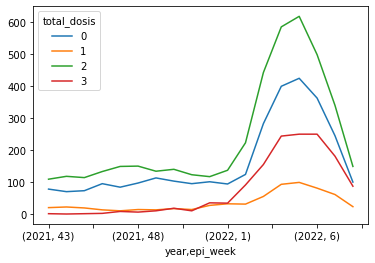

In [6]:
ct_falVac.plot()

In [7]:
df = pd.read_csv('Data/DP4_covid19-peru_x_fecha.csv')

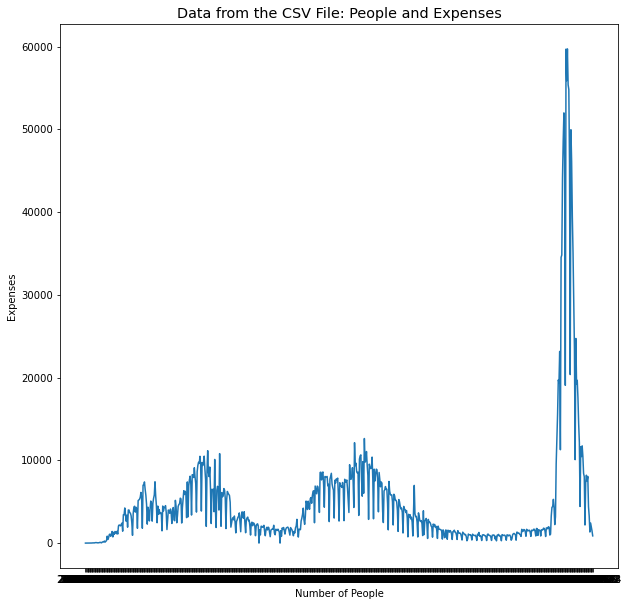

In [8]:
fig, ax = plt.subplots(figsize=(10,10))  # Create a figure
plt.style.use('ggplot')  # Using the style for the plot

plt.plot(df['date'],df['casos'])

plt.title('Data from the CSV File: People and Expenses')

plt.xlabel('Number of People')
plt.ylabel('Expenses')

plt.show()